In [2]:
# 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  itertools import combinations
sns.set(palette='pastel')
sns.set(font_scale=2)

# Abstract

#### error data를 다양한 feature들을 이용해서 탐색

### 1. 데이터 불러오기
### 2. 

# 수정사항
### Ver 1. 8/30/Error data 탐색 계획

#### 1. 못 본게 많은 feature들을 골라낸다?
#### - 제대로 반영되지 않은 feature들에서 error data, correct data가 어떤 분포를 가지는지 파악 
 
#### 2. 제대로 분류하지 못한 data들의 특성을 파악한다.
#### - error data와 correct 데이터가 feature들에서 어떤 분포를 가지는지를 파악
#### - 그 data들의 특성을 반영할 feature를 찾거나 만든다?

#### 이 과정을 통해 insight를 도출

## 1. 데이터 불러오기

In [8]:
#train_act=pd.read_csv('transformed/train_real_values.csv')
#train_trade=pd.read_csv('Trade_features/training_trade_na_filled.csv')
#train_guild=pd.read_csv('')
#train_party=
#test_act=
#test_trade=
#test_guild=
#test_party=

## 1.1. 최종 feature들을 불러옴

In [3]:
train_set=pd.read_csv('FE and error_set/X_train_487.csv')
test_set=pd.read_csv('FE and error_set/X_test_487.csv')

In [7]:
#NA 값이 채워지지 않아 NA 값을 확인해야함
train_set.head()

,payment_amount_CAT_stat,payment_amount_min_stat,payment_amount_max_stat,payment_amount_range_stat,payment_amount_median_stat,payment_amount_sum_stat,cnt_dt_CAT_stat,cnt_dt_min_stat,cnt_dt_max_stat,cnt_dt_range_stat,...,exc_last,give_first,give_second,give_third,rec_first,rec_second,rec_third,exc_first,exc_second,exc_third
0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,1,2.0,7.0,5.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3960.0,178200.0,174240.0,69300.0,407010.0,1,6.0,7.0,1.0,...,7.0,2.0,1.0,5.0,5.0,3.0,1.0,2.0,3.0,1.0


In [36]:
train_set.columns

Index(['payment_amount_CAT_stat', 'payment_amount_min_stat',
       'payment_amount_max_stat', 'payment_amount_range_stat',
       'payment_amount_median_stat', 'payment_amount_sum_stat',
       'cnt_dt_CAT_stat', 'cnt_dt_min_stat', 'cnt_dt_max_stat',
       'cnt_dt_range_stat',
       ...
       'exc_last', 'give_first', 'give_second', 'give_third', 'rec_first',
       'rec_second', 'rec_third', 'exc_first', 'exc_second', 'exc_third'],
      dtype='object', length=487)

In [12]:
#NA 값이 채워지지 않아 NA 값을 확인해야함
test_set.head()

,payment_amount_CAT_stat,payment_amount_min_stat,payment_amount_max_stat,payment_amount_range_stat,payment_amount_median_stat,payment_amount_sum_stat,cnt_dt_CAT_stat,cnt_dt_min_stat,cnt_dt_max_stat,cnt_dt_range_stat,...,exc_last,give_first,give_second,give_third,rec_first,rec_second,rec_third,exc_first,exc_second,exc_third
0,1,58410.0,495000.0,436590.0,149490.0,999900.0,1,2.0,5.0,3.0,...,NaN,5.0,1.0,3.0,3.0,2.0,1.0,NaN,NaN,NaN
1,1,19800.0,396000.0,376200.0,64350.0,831600.0,1,5.0,7.0,2.0,...,8.0,2.0,1.0,4.0,7.0,3.0,8.0,6.0,2.0,3.0
2,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,1,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,1,1.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 error data를 불러옴

In [18]:
error_set = pd.read_csv('FE and error_set/error_set_0.741.csv')

In [19]:
error_set.head()

,new_id,label,y_pred
0,tr0,month,2month
1,tr1,week,week
2,tr2,retained,retained
3,tr3,week,week
4,tr4,retained,retained


In [21]:
#원래 len과 맞는지 비교
len(error_set)

100000

# 2. Error data EDA

## 2.1. label과 예측의 heatmap

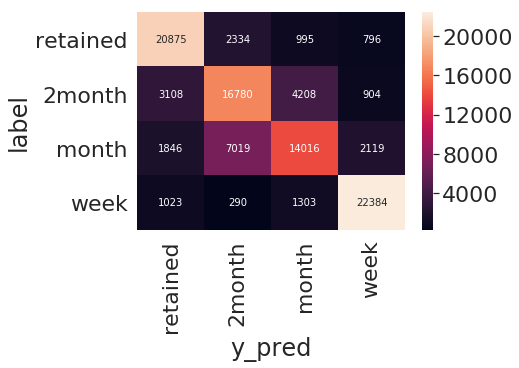

In [33]:
#error의 heatmap을 그려봄
sns.heatmap(pd.crosstab(error_set.label,error_set.y_pred)[['retained','2month','month','week']].reindex(index=['retained','2month','month','week']),annot=True,fmt="d")

In [301]:
for i in train_set.columns:
    print('\n',i,train_set[(error_set.label!=error_set.y_pred)&(error_set.label=='month')][i].value_counts().sort_index(ascending=True))


 payment_amount_CAT_stat 0    10135
1      849
Name: payment_amount_CAT_stat, dtype: int64

 payment_amount_min_stat 990.0        32
1980.0       10
2970.0        7
3960.0        6
4950.0       47
5940.0        3
6930.0        3
7920.0        1
9900.0      117
10890.0       5
11880.0       2
12000.0       5
12870.0       3
13860.0       3
14850.0      13
15840.0       2
17820.0       1
18810.0       2
19800.0     251
20790.0       4
21780.0       1
23760.0       1
24750.0       5
25740.0       1
28710.0       2
29700.0      87
30690.0       2
31680.0       1
31800.0       1
32670.0       1
           ... 
69300.0       7
77220.0       2
79200.0       7
84150.0       1
89100.0       5
94050.0       1
99000.0      22
99990.0       2
101970.0      1
105930.0      1
108900.0      3
118800.0      3
128700.0      2
138600.0      2
148500.0      3
149490.0      1
150480.0      1
158400.0      1
178200.0      1
198000.0      4
207900.0      1
227700.0      1
241560.0      1
257400.0      2
29


 play_time_median_stat 2.0          1
7.0          1
15.5         1
20.0        36
21.0         1
22.0         1
29.0        18
30.0         2
31.0         1
32.5         1
37.0         3
38.0         9
39.0        10
40.0         3
42.5         1
44.0         1
46.0         1
47.0         2
49.0         2
50.0         3
55.0         1
57.0         2
59.0         2
60.0         1
61.0         1
63.0         4
64.0         3
65.0         4
66.0         2
72.0         1
            ..
426545.0     1
427538.5     1
427745.5     1
429994.0     1
430047.5     1
431233.0     1
433099.0     1
433650.0     1
435002.5     1
436577.0     1
436695.0     1
438782.0     1
438974.0     1
444099.5     1
445916.0     1
453591.5     1
461341.5     1
462350.5     1
462568.0     1
463343.5     1
463683.0     1
474670.0     1
475910.0     1
487034.0     1
492669.0     1
515313.0     1
527054.5     1
535669.5     1
556533.0     1
567254.0     1
Name: play_time_median_stat, Length: 5443, dtype: int64

 pla


 get_money_range_stat 0.000000e+00    906
9.000000e+00      1
1.000000e+01      1
1.600000e+01      1
1.800000e+01      1
1.900000e+01      2
2.100000e+01      2
3.800000e+01      1
4.000000e+01      1
4.300000e+01      1
5.600000e+01      1
7.800000e+01      1
7.900000e+01      1
8.900000e+01      2
9.100000e+01      1
1.200000e+02      1
1.230000e+02      1
1.240000e+02      1
1.360000e+02      2
1.370000e+02      1
1.460000e+02      1
1.590000e+02      1
1.620000e+02      1
1.900000e+02      1
1.920000e+02      1
2.000000e+02      1
2.060000e+02      1
2.140000e+02      1
2.200000e+02      1
2.210000e+02      1
               ... 
3.425001e+08      1
3.700969e+08      1
4.003407e+08      1
4.619295e+08      1
5.000441e+08      1
5.010024e+08      1
5.013701e+08      1
5.025683e+08      1
5.202694e+08      1
5.540179e+08      1
5.900214e+08      1
6.000010e+08      1
6.200320e+08      1
6.234372e+08      1
6.386522e+08      1
6.683436e+08      1
7.013858e+08      1
7.048786e+08     


 npc_exp_range_stat 0.0         5265
17.0           1
80.0           1
116.0          1
146.0          1
153.0          1
154.0          1
168.0          1
199.0          1
204.0          1
224.0          1
226.0          1
268.0          1
280.0          1
353.0          1
355.0          1
375.0          1
398.0          1
462.0          1
485.0          1
496.0          1
507.0          1
553.0          1
573.0          1
577.0          1
624.0          2
625.0          1
627.0          1
692.0          1
696.0          1
            ... 
212111.0       1
214407.0       1
218759.0       1
222636.0       1
226585.0       1
229735.0       1
231305.0       1
233874.0       1
234321.0       1
235706.0       1
237206.0       1
252140.0       1
252509.0       1
255726.0       1
260830.0       1
262164.0       1
267003.0       1
273355.0       1
276066.0       1
276851.0       1
277961.0       1
279228.0       1
287872.0       1
290685.0       1
312264.0       1
315100.0       1
317601.0  


 quest_exp_max_stat 200.0            2
300.0            1
360.0            1
870.0            1
900.0            1
1300.0           1
2000.0           1
2190.0           1
2500.0           1
2520.0           1
2800.0           7
2810.0           1
3000.0           1
4100.0           1
4200.0           9
4360.0           1
4400.0           1
4410.0           1
4917.0           1
5500.0           1
5600.0           1
5800.0          17
5810.0           1
6800.0           2
7210.0           1
8400.0           1
8440.0           1
8610.0        4174
8800.0           1
8860.0           1
              ... 
17144990.0       1
17176820.0       1
17198040.0       1
17279730.0       1
17340190.0       1
17363570.0       1
17371670.0       2
17414410.0       1
17415610.0       1
17428620.0       1
17459560.0       1
17482260.0       1
17592060.0       1
17592390.0       1
17601860.0       1
17627230.0       1
17645060.0       1
17677530.0       1
17690860.0       1
17718630.0       1
17722800.0


 item_hongmun_min_stat 1.0        85
2.0        29
3.0        76
4.0        44
5.0        58
6.0        28
7.0        27
8.0        28
9.0        21
10.0      140
11.0       17
12.0       57
13.0       22
14.0       16
15.0       27
16.0       17
17.0       13
18.0       22
19.0       12
20.0       51
21.0       14
22.0       10
23.0        7
24.0       20
25.0       11
26.0       11
27.0        8
28.0        9
29.0       10
30.0       17
         ... 
465.0       1
471.0       1
477.0       1
484.0       1
485.0       2
493.0       1
494.0       1
497.0       1
500.0       3
510.0       1
518.0       1
523.0       1
535.0       1
570.0       2
641.0       1
645.0       1
680.0       1
690.0       2
723.0       1
728.0       1
731.0       1
749.0       1
782.0       1
990.0       1
1010.0      1
1467.0      1
1472.0      1
1528.0      1
1800.0      1
2679.0      1
Name: item_hongmun_min_stat, Length: 320, dtype: int64

 item_hongmun_max_stat 1.0       16
2.0        4
3.0       11
4.0 


 partybattle_cnt_min_stat 1.0     135
2.0      53
3.0      46
4.0      28
5.0      19
6.0      18
7.0       8
8.0       8
9.0       6
10.0      2
11.0     12
12.0      4
13.0      6
14.0      3
15.0      2
16.0      3
17.0      3
18.0      1
19.0      2
20.0      1
21.0      2
23.0      2
24.0      1
25.0      1
26.0      2
28.0      2
29.0      5
31.0      1
32.0      1
33.0      2
34.0      2
35.0      3
36.0      1
37.0      4
39.0      1
40.0      1
41.0      1
45.0      1
46.0      1
47.0      1
49.0      1
50.0      1
51.0      1
52.0      1
56.0      1
60.0      1
66.0      1
67.0      1
69.0      1
Name: partybattle_cnt_min_stat, dtype: int64

 partybattle_cnt_max_stat 1.0      58
2.0      30
3.0      28
4.0      24
5.0      26
6.0      11
7.0      11
8.0      12
9.0       7
10.0     11
11.0      7
12.0      7
13.0      7
14.0     11
15.0      5
16.0      7
17.0      8
18.0      7
19.0      6
20.0      2
21.0      6
22.0      4
23.0      5
24.0      3
25.0      1
26.0      4
2


 cnt_enter_inzone_light_CAT_stat 0    9146
1    1838
Name: cnt_enter_inzone_light_CAT_stat, dtype: int64

 cnt_enter_inzone_light_min_stat 1.0      424
2.0      287
3.0      199
4.0      168
5.0       99
6.0       82
7.0       47
8.0       51
9.0       45
10.0      32
11.0      36
12.0      19
13.0      29
14.0      18
15.0      10
16.0      15
17.0      17
18.0      12
19.0       7
20.0      11
21.0      19
22.0      10
23.0       6
24.0       8
25.0       6
26.0      10
27.0       5
28.0       5
29.0       5
30.0       5
        ... 
76.0       1
77.0       1
78.0       1
79.0       1
85.0       1
86.0       1
89.0       1
90.0       2
94.0       1
96.0       2
97.0       1
98.0       1
99.0       1
101.0      3
103.0      1
106.0      2
108.0      1
110.0      1
111.0      2
116.0      1
119.0      1
120.0      1
135.0      1
136.0      1
156.0      1
157.0      1
170.0      1
192.0      1
252.0      1
287.0      1
Name: cnt_enter_inzone_light_min_stat, Length: 96, dtype: int64

 c


 cnt_enter_inzone_normal_range_stat 0.0      826
1.0       94
2.0       76
3.0      153
4.0       59
5.0       58
6.0       91
7.0       46
8.0       51
9.0       56
10.0      46
11.0      40
12.0      37
13.0      43
14.0      35
15.0      44
16.0      48
17.0      31
18.0      36
19.0      26
20.0      17
21.0      26
22.0      23
23.0      26
24.0      21
25.0      17
26.0      22
27.0      18
28.0       7
29.0      22
        ... 
182.0      1
185.0      1
199.0      2
212.0      2
213.0      1
214.0      1
245.0      2
248.0      1
250.0      1
253.0      1
265.0      1
268.0      2
276.0      1
277.0      1
284.0      2
285.0      1
292.0      1
295.0      1
297.0      1
306.0      2
308.0      1
309.0      1
314.0      1
325.0      1
330.0      1
340.0      1
344.0      1
345.0      1
369.0      1
590.0      1
Name: cnt_enter_inzone_normal_range_stat, Length: 177, dtype: int64

 cnt_enter_inzone_normal_median_stat 1.0      155
1.5       30
2.0      158
2.5       29
3.0      277


 normal_chat_sum_stat 1.0       167
2.0       203
3.0        84
4.0        65
5.0        48
6.0        49
7.0        52
8.0        33
9.0        40
10.0       32
11.0       35
12.0       19
13.0       29
14.0       31
15.0       20
16.0       25
17.0       16
18.0       15
19.0       24
20.0       22
21.0       26
22.0       31
23.0       44
24.0       29
25.0       21
26.0       17
27.0       18
28.0       19
29.0       12
30.0        8
         ... 
717.0       1
739.0       1
746.0       1
770.0       1
796.0       1
807.0       1
852.0       1
862.0       1
888.0       1
921.0       1
983.0       1
987.0       1
993.0       1
1046.0      1
1058.0      1
1060.0      1
1111.0      1
1273.0      1
1359.0      1
1370.0      1
1487.0      1
1567.0      1
1582.0      1
1764.0      1
1766.0      1
1845.0      1
1939.0      1
4465.0      1
5009.0      1
6041.0      1
Name: normal_chat_sum_stat, Length: 300, dtype: int64

 whisper_chat_CAT_stat 0    9337
1    1647
Name: whisper_chat_CAT_st


 district_chat_sum_stat 1.0       119
2.0        61
3.0        45
4.0        38
5.0        19
6.0        28
7.0        24
8.0        18
9.0        18
10.0       11
11.0       12
12.0       10
13.0        9
14.0        7
15.0        6
16.0        9
17.0        7
18.0        9
19.0        4
20.0       10
21.0       10
22.0        7
23.0        5
24.0        4
25.0        4
26.0        5
27.0        3
28.0        4
29.0        5
30.0       11
         ... 
504.0       1
516.0       1
533.0       1
574.0       1
576.0       1
580.0       1
581.0       1
612.0       1
702.0       1
775.0       2
836.0       1
837.0       1
881.0       1
896.0       1
923.0       1
932.0       1
1026.0      1
1092.0      1
1106.0      1
1140.0      1
1222.0      1
1262.0      1
1287.0      1
1334.0      1
1396.0      1
1402.0      1
1664.0      1
1820.0      1
2254.0      1
3852.0      1
Name: district_chat_sum_stat, Length: 203, dtype: int64

 party_chat_CAT_stat 0    8878
1    2106
Name: party_chat_CAT_st


 guild_chat_sum_stat 1.0        30
2.0        30
3.0        22
4.0        13
5.0        13
6.0         9
7.0         9
8.0        11
9.0        12
10.0        3
11.0        5
12.0        5
13.0        5
14.0        6
15.0        4
16.0        7
17.0        3
18.0        4
19.0        2
20.0        6
22.0        7
23.0        2
24.0        3
25.0        2
26.0        1
27.0        6
28.0        2
29.0        1
30.0        1
32.0        2
           ..
9931.0      1
9974.0      1
9978.0      1
10007.0     1
10291.0     1
10330.0     1
10605.0     1
10626.0     1
10730.0     1
10863.0     1
11042.0     1
11191.0     1
11196.0     1
11343.0     1
11838.0     1
11845.0     1
12303.0     1
12439.0     1
12546.0     1
13114.0     1
13232.0     1
13748.0     1
14361.0     1
16555.0     1
17382.0     1
18889.0     1
19842.0     1
22624.0     1
28698.0     1
37080.0     1
Name: guild_chat_sum_stat, Length: 946, dtype: int64

 making_cnt_CAT_stat 0    9817
1    1167
Name: making_cnt_CAT_stat, dt


 payment_amount_MA_1_basic_time 0.0         10386
247.5           3
495.0           2
742.5           2
1237.5          9
2475.0         22
2722.5          1
3465.0          1
3712.5          1
4950.0         83
5197.5          5
5445.0          1
5940.0          1
6187.5          8
6435.0          1
7177.5          2
7425.0         47
7920.0          1
7950.0          3
8662.5          4
9900.0         13
10147.5         2
10395.0         2
10642.5         1
11137.5         3
11385.0         1
11632.5         1
12375.0        37
12622.5         2
13117.5         1
            ...  
112612.5        1
116325.0        2
117562.5        1
118800.0        1
119790.0        1
121275.0        1
123750.0        3
123997.5        1
124987.5        5
125235.0        1
125482.5        1
126225.0        1
132225.0        1
137362.5        1
137610.0        1
146550.0        1
148500.0        1
149737.5        1
149985.0        1
154687.5        1
155925.0        1
167062.5        1
169785.0     


 party_chat_var_basic_time 0.000000e+00    8878
1.250000e-01      61
2.142857e-01       8
2.678571e-01       1
4.107143e-01       3
5.000000e-01      41
5.535714e-01      12
5.714286e-01       4
6.964286e-01       4
7.857143e-01       2
8.571429e-01       3
9.821429e-01       1
1.071429e+00       3
1.125000e+00      33
1.142857e+00       5
1.267857e+00       4
1.357143e+00       6
1.410714e+00       3
1.428571e+00       2
1.553571e+00       5
1.642857e+00       4
1.696429e+00       1
1.714286e+00       3
1.839286e+00       4
1.928571e+00       5
1.982143e+00       5
2.000000e+00      35
2.125000e+00       3
2.214286e+00       1
2.285714e+00       2
                ... 
2.967357e+05       1
3.007037e+05       1
3.095989e+05       1
3.149662e+05       1
3.496899e+05       1
3.528211e+05       1
3.539086e+05       1
3.610320e+05       1
3.711661e+05       1
3.713869e+05       1
4.185353e+05       1
4.193277e+05       1
4.292186e+05       1
4.681990e+05       1
4.989300e+05       1
5.0934


 party_chat_cycle_basic_time -0.904080    1
-0.850239    1
-0.832070    1
-0.831242    1
-0.830291    1
-0.819030    1
-0.714328    1
-0.712784    1
-0.709002    1
-0.705357    1
-0.692910    1
-0.689490    1
-0.629382    1
-0.619636    1
-0.602963    1
-0.597470    1
-0.589208    1
-0.577778    1
-0.577191    1
-0.575000    1
-0.571573    1
-0.564236    1
-0.562924    1
-0.555273    1
-0.554774    1
-0.547949    1
-0.547688    1
-0.542373    1
-0.540190    1
-0.537338    1
            ..
 0.975875    1
 0.977124    1
 0.977417    1
 0.978988    1
 0.981260    1
 0.982100    1
 0.982346    1
 0.982710    1
 0.984307    1
 0.984392    1
 0.985197    1
 0.986278    1
 0.986513    1
 0.988969    1
 0.989749    3
 0.989749    2
 0.992171    1
 0.994123    1
 0.994346    1
 0.995066    1
 0.995518    1
 0.995884    1
 0.996237    1
 0.997983    1
 0.998475    1
 0.998695    1
 0.999466    1
 0.999783    1
 0.999831    1
 0.999951    1
Name: party_chat_cycle_basic_time, Length: 1459, dtype:


 whisper_chat_MA_3_basic_time 0.00      9666
0.25        75
0.50        63
0.75        39
1.00        31
1.25        33
1.50        24
1.75        25
2.00        34
2.25        13
2.50        20
2.75        19
3.00        13
3.25        28
3.50        20
3.75        18
4.00        32
4.25        22
4.50        17
4.75        25
5.00        27
5.25        10
5.50        14
5.75        20
6.00        13
6.25        18
6.50        11
6.75        12
7.00        15
7.25        12
          ... 
247.00       1
252.25       1
254.00       1
264.50       1
275.50       1
286.75       1
295.25       1
304.00       1
307.00       1
308.00       1
311.25       1
330.50       1
338.50       1
339.50       1
341.50       1
352.75       1
358.25       1
365.25       1
386.25       1
390.75       1
427.25       1
521.50       1
572.75       1
575.50       1
607.50       1
625.75       1
651.50       1
823.75       1
959.25       1
966.75       1
Name: whisper_chat_MA_3_basic_time, Length: 338, dtype


 normal_chat_MA_3_basic_time 0.00       9719
0.25        113
0.50        102
0.75         66
1.00         33
1.25         47
1.50         32
1.75         30
2.00         22
2.25         30
2.50         27
2.75         21
3.00         22
3.25         22
3.50         17
3.75          9
4.00         14
4.25         14
4.50         17
4.75          9
5.00          9
5.25         10
5.50         18
5.75         12
6.00         14
6.25         15
6.50         12
6.75         12
7.00         11
7.25         10
           ... 
104.75        2
107.00        2
107.75        1
108.75        1
112.00        1
115.75        1
123.00        1
124.75        1
125.75        1
127.00        1
139.25        1
141.00        1
141.75        1
148.25        1
148.75        1
154.75        1
160.00        1
183.50        3
201.25        1
203.50        1
205.00        1
214.00        1
228.50        1
239.00        1
263.00        1
268.75        1
417.25        1
461.25        1
606.00        1
1011.75   


 guild_chat_MA_3_basic_time 0.00       9897
0.25         37
0.50         23
0.75         17
1.00          8
1.25          5
1.50          8
1.75          5
2.00          8
2.25          4
2.50          6
2.75          6
3.00          3
3.25          1
3.50          4
3.75          4
4.00          3
4.25          1
4.50          4
4.75          1
5.00          2
5.25          1
5.50          3
5.75          3
6.00          8
6.25          3
6.50          3
6.75          2
7.00          5
7.25          6
           ... 
1285.00       1
1286.00       1
1300.75       1
1308.50       1
1325.00       1
1346.50       1
1356.00       1
1396.75       1
1400.25       1
1407.25       1
1430.25       1
1452.50       1
1456.00       1
1490.00       1
1496.75       1
1502.25       1
1503.50       1
1510.00       1
1572.00       1
1666.25       1
1732.75       1
1780.75       1
1965.00       1
1976.25       1
2444.25       1
2652.00       1
2876.25       1
3201.00       1
3589.75       1
4876.50    


 quest_hongmun_kurt_basic_time -2.690039      1
-2.686364      1
-2.638919      1
-2.593285      1
-2.567318      1
-2.558942      1
-2.550836      1
-2.528567      1
-2.491842      1
-2.454391      1
-2.453124      1
-2.422014      1
-2.406539      1
-2.386408      1
-2.371450      1
-2.327936      1
-2.320273      1
-2.273906      1
-2.252687      1
-2.244576      1
-2.240000      1
-2.240000      1
-2.239998      1
-2.239986      1
-2.239188      1
-2.232810      1
-2.229194      1
-2.220313      1
-2.218013      1
-2.216838      1
            ... 
 7.999486      1
 7.999524      1
 7.999525      1
 7.999646      1
 7.999652      1
 7.999756      1
 7.999760      1
 7.999782      1
 7.999844      1
 7.999844      1
 7.999885      2
 7.999937      1
 7.999948      1
 7.999957      1
 7.999971      1
 7.999987      1
 7.999990      1
 7.999990      1
 7.999991      1
 7.999993      1
 7.999993      1
 7.999997      1
 8.000000      2
 8.000000    957
 8.000000    208
 8.000000    512


 npc_hongmun_skew_basic_time -2.635988      1
-2.343378      1
-2.140115      1
-2.106495      1
-2.089662      1
-2.079512      1
-1.972811      1
-1.946533      1
-1.941132      1
-1.851312      1
-1.814816      1
-1.794476      1
-1.783391      1
-1.713159      1
-1.698161      1
-1.696330      1
-1.659521      1
-1.607410      1
-1.574968      1
-1.536312      1
-1.507026      1
-1.493869      1
-1.492809      1
-1.428602      1
-1.414750      1
-1.411971      1
-1.364504      1
-1.325444      1
-1.317077      1
-1.303141      1
            ... 
 2.824980      1
 2.826511      1
 2.826520      1
 2.826777      1
 2.826806      1
 2.826847      1
 2.827107      1
 2.827201      1
 2.827336      1
 2.827465      1
 2.827564      1
 2.827748      1
 2.827867      1
 2.827985      1
 2.828001      1
 2.828223      1
 2.828241      1
 2.828278      1
 2.828374      1
 2.828415      1
 2.828419      1
 2.828420      1
 2.828426      1
 2.828427      1
 2.828427      2
 2.828427      2
 


 item_hongmun_median_basic_time 0.0       9827
0.5          9
1.0          3
1.5          5
2.0          2
2.5          5
3.0          3
3.5          4
4.0          4
4.5          5
5.0         23
5.5          9
6.0         12
6.5         12
7.0          7
7.5          3
8.0         13
8.5          7
9.0          5
9.5          2
10.0        23
10.5         7
11.0        10
11.5         5
12.0        18
12.5        10
13.0         6
13.5         7
14.0         5
14.5         4
          ... 
815.0        1
820.0        1
822.0        1
844.5        1
849.0        1
852.5        1
893.0        1
904.0        1
905.5        1
952.0        1
972.0        1
1006.5       1
1197.5       1
1214.5       1
1230.5       1
1240.0       1
1298.5       1
1379.0       1
1418.5       1
1535.0       1
1663.0       1
1894.5       1
2075.0       1
2246.0       1
2264.0       1
2390.0       1
2866.0       1
2940.0       1
3048.0       1
3768.5       1
Name: item_hongmun_median_basic_time, Length: 569, d


 item_hongmun_MA_4_basic_time 0.00       9486
0.25         14
0.50          4
0.75          9
1.00          3
1.25          9
1.50          2
1.75          3
2.00          4
2.50         20
2.75          4
3.00         11
3.25          1
3.50          1
3.75          3
4.00          6
4.25          2
4.50          8
4.75          1
5.00          7
5.25          6
5.50          2
5.75          4
6.00          4
6.25          6
6.50          3
6.75          5
7.00          4
7.25          1
7.50          8
           ... 
1208.50       1
1319.50       1
1374.75       1
1381.25       1
1393.25       1
1396.50       1
1454.00       1
1472.50       1
1485.50       2
1553.25       1
1568.00       1
1607.50       1
1648.50       2
1653.75       1
1681.75       1
1712.25       1
2263.25       1
2305.75       1
2312.00       1
2329.00       1
2380.25       1
2418.50       1
2472.50       1
2555.00       1
2663.00       1
2868.50       1
3050.25       1
4113.00       1
4385.00       1
5834.00  


 inzone_light_MA_4_basic_time -0.330316        1
-0.330316     9515
-0.330316        7
-0.326320        4
-0.326320       22
-0.322323        5
-0.322323        4
-0.321707       33
-0.321707        6
-0.318327        1
-0.318327        1
-0.317710        1
-0.317710        2
-0.317710       10
-0.317094        1
-0.314331        1
-0.313714        9
-0.313714        4
-0.313098        1
-0.313098        8
-0.313098       26
-0.313098        3
-0.310334        1
-0.310334        1
-0.309718        1
-0.309101        1
-0.309101        2
-0.309101        7
-0.305105        1
-0.305105        4
              ... 
 4.460917        1
 4.480602        1
 4.488001        1
 4.515998        1
 4.542419        1
 4.562400        1
 4.578682        1
 4.598093        1
 4.620175        1
 4.623921        1
 4.623921        1
 4.702933        1
 4.901240        1
 4.940540        1
 4.945153        1
 4.966391        1
 5.040790        1
 5.131448        1
 5.144466        1
 5.152459        1



 inzone_normal_MA_3_basic_time -0.355712    9351
-0.355712      55
-0.351802      15
-0.351802      21
-0.351802       1
-0.347893       9
-0.347893       2
-0.347286      43
-0.347286       3
-0.343983       2
-0.343376       3
-0.343376      12
-0.340074       2
-0.340074       1
-0.339467       2
-0.339467       2
-0.339467       1
-0.339467       1
-0.338860      23
-0.338860      13
-0.338860       2
-0.338860       1
-0.336164       2
-0.335557       1
-0.334951       1
-0.334951      10
-0.334951       1
-0.334951       2
-0.334951       1
-0.334951       1
             ... 
 4.431470       1
 4.432077       1
 4.539184       1
 4.545252       1
 4.595131       1
 4.884372       1
 5.220528       1
 5.232256       1
 5.239329       1
 5.239936       1
 5.551152       1
 5.721618       1
 5.832973       1
 5.859265       1
 5.954237       1
 6.054271       1
 6.181533       1
 6.347751       1
 6.387861       1
 6.502320       1
 6.544518       1
 6.555570       1
 6.754217     


 cnt_dt_kurt_time_series -2.800000      35
-2.741551       3
-2.702616       1
-2.691296       6
-2.677339       2
-2.666186       3
-2.665080       2
-2.601248      11
-2.598400       1
-2.590060       6
-2.572571       1
-2.554728       4
-2.529042       3
-2.480277       1
-2.480030       7
-2.475693       1
-2.468379       3
-2.464856       3
-2.464497       2
-2.463734       6
-2.435108       2
-2.431544       2
-2.376543       4
-2.365089       2
-2.363455       2
-2.361186       1
-2.358479      15
-2.353464       1
-2.347068       2
-2.330414       9
             ... 
 5.002997       9
 5.122206       1
 5.205396      13
 5.229399       1
 5.260404       1
 5.304688       2
 5.468750     153
 5.490022       1
 5.530864      29
 5.550296       3
 5.665625       1
 5.830965       2
 5.885324       1
 5.925762       2
 5.958826       3
 6.020000       2
 6.080800      11
 6.375273      14
 6.504018      46
 6.571901       1
 6.609681       4
 6.763285       1
 6.860000      19
 6


 play_time_var_time_series 5.000000e-01     1
6.125000e+00     1
5.000000e+01    36
5.498214e+01     1
5.512500e+01     1
6.050000e+01     1
1.051250e+02    18
1.125000e+02     2
1.201250e+02     1
1.711250e+02     3
1.805000e+02     9
1.901250e+02    10
2.000000e+02     3
2.521250e+02     1
2.645000e+02     1
2.761250e+02     1
3.001250e+02     1
3.125000e+02     3
3.781250e+02     1
3.888393e+02     1
4.061250e+02     2
4.351250e+02     2
4.500000e+02     1
4.651250e+02     1
4.736429e+02     1
4.961250e+02     4
5.120000e+02     3
5.281250e+02     4
5.445000e+02     2
6.480000e+02     1
                ..
4.109648e+10     1
4.127464e+10     1
4.127523e+10     1
4.127957e+10     1
4.151490e+10     1
4.186312e+10     1
4.193539e+10     1
4.198338e+10     1
4.199434e+10     1
4.212604e+10     1
4.285590e+10     1
4.303476e+10     1
4.354631e+10     1
4.359042e+10     1
4.401898e+10     1
4.411976e+10     1
4.416030e+10     1
4.590008e+10     1
4.633154e+10     1
4.635431e+10     1
4.6


 play_time_MA_5_time_series 0.50          1
1.75          1
4.75          1
5.00         36
5.25          1
5.50          1
7.25         18
7.50          2
7.75          2
9.25          3
9.50          9
9.75         10
10.00         3
11.50         1
11.75         1
12.00         1
12.25         1
12.50         3
13.75         1
14.25         2
14.75         2
15.00         1
15.25         1
15.75         4
16.00         3
16.25         6
16.50         2
16.75         1
18.00         1
18.75         1
             ..
314387.00     1
315961.75     1
318404.00     1
319230.75     1
319479.75     1
319709.50     1
320614.25     1
321852.50     1
322961.25     1
327951.25     1
328964.50     1
341130.75     1
342977.75     1
348623.25     1
351509.75     1
356018.50     1
360378.50     1
368361.75     1
385838.50     1
389880.50     1
391529.25     1
426764.25     1
435866.50     1
435947.25     1
487381.75     1
491308.50     1
513077.75     1
513268.50     1
525541.75     1
576573.25  


 play_time_cycle_time_series -0.894714    1
-0.860370    1
-0.844036    1
-0.840965    1
-0.830536    1
-0.828277    1
-0.826375    1
-0.824696    1
-0.818150    1
-0.814082    1
-0.805397    1
-0.797503    1
-0.795010    1
-0.790517    1
-0.788926    1
-0.788650    1
-0.786754    1
-0.772274    1
-0.769521    1
-0.761391    1
-0.759718    1
-0.759583    1
-0.749687    1
-0.736706    1
-0.734926    1
-0.734486    1
-0.732826    1
-0.727217    1
-0.723511    1
-0.723113    1
            ..
 0.987529    1
 0.989119    1
 0.989561    1
 0.990681    1
 0.991717    1
 0.993535    1
 0.993646    1
 0.994012    1
 0.994953    1
 0.995091    1
 0.995172    1
 0.995585    1
 0.996275    1
 0.996728    1
 0.996977    1
 0.997019    1
 0.998860    1
 0.998971    1
 0.999024    1
 0.999055    1
 0.999109    1
 0.999166    1
 0.999488    1
 0.999566    1
 0.999742    1
 0.999774    1
 0.999855    1
 0.999905    1
 0.999955    1
 0.999965    1
Name: play_time_cycle_time_series, Length: 6290, dtype:


 game_combat_time_MA_3_time_series 0.00         7822
1.00            8
1.25           16
1.75            1
2.00            2
2.25            4
2.50            3
3.00            1
3.50            4
3.75            2
4.00            1
4.25            4
4.50            1
4.75            2
5.00            1
5.50            1
5.75            1
6.00            1
6.50            1
6.75            1
7.00            1
7.25            1
7.50            1
7.75            1
8.00            2
8.25            1
8.50            2
9.50            1
10.25           1
10.50           3
             ... 
112869.25       1
114815.25       1
121739.25       1
130671.50       1
130863.25       1
132277.25       1
132302.00       1
133616.75       1
135367.50       1
136183.75       1
138512.50       1
140714.25       1
143895.25       1
145445.25       1
145996.25       1
146964.00       1
150134.25       1
151887.75       1
153036.50       1
157086.00       1
157904.75       1
160291.50       1
163914.75 


 game_combat_time_diff_w2_by_last_time_series -117363    1
-107912    1
-106163    1
-105512    1
-103782    1
-100121    1
-92926     1
-92623     1
-80118     1
-77321     1
-76967     1
-75471     1
-73828     1
-73691     1
-73672     1
-73466     1
-72976     1
-71834     1
-69879     1
-68421     1
-67054     1
-63937     1
-59744     1
-58437     1
-56767     1
-54687     1
-54021     1
-53905     1
-52888     1
-52002     1
          ..
 137008    1
 137116    1
 137152    1
 137245    1
 137371    1
 137381    1
 137474    1
 137855    1
 137910    1
 137988    1
 138782    1
 139102    1
 139175    1
 139229    1
 139402    1
 139407    1
 139499    1
 140132    1
 140591    1
 140824    1
 140913    1
 141394    1
 141654    1
 142204    1
 142899    1
 144028    1
 145044    1
 153417    1
 157195    1
 236576    1
Name: game_combat_time_diff_w2_by_last_time_series, Length: 3169, dtype: int64

 game_combat_time_diff_w4_by_last_time_series -199527    1
-186472    1
-167142 


 get_money_skew_time_series -2.660028      1
-2.576976      1
-2.519952      1
-2.279200      1
-2.191331      1
-2.118448      1
-2.053725      1
-2.016463      1
-1.909942      1
-1.878027      1
-1.854212      1
-1.844243      1
-1.824434      1
-1.632128      1
-1.549438      1
-1.513507      1
-1.500322      1
-1.485898      1
-1.392080      1
-1.363507      1
-1.281954      1
-1.262377      1
-1.261075      1
-1.256762      1
-1.236706      1
-1.186671      1
-1.158758      1
-1.137926      1
-1.130552      1
-1.114204      1
            ... 
 2.828424      1
 2.828424      1
 2.828425      1
 2.828426      1
 2.828426      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      1
 2.828427      2
 2.828427      1
 2


 get_money_diff1_time_series -8269600659     1
-7600000949     1
-2103276897     1
-1503595288     1
-1068965119     1
-710368433      1
-696768897      1
-620562182      1
-247282198      1
-117133881      1
-104967254      1
-83616607       1
-79993558       1
-67567849       1
-57048593       1
-54176622       1
-54049358       1
-47481897       1
-39142253       1
-38698068       1
-34283162       1
-33435955       1
-31756454       1
-29905103       1
-28680849       1
-26152395       1
-25307893       1
-24770079       1
-23693670       1
-21571857       1
               ..
 26245269       1
 26666811       1
 27748072       1
 28239190       1
 29850457       1
 30797599       1
 31700174       1
 34932743       1
 35433591       1
 39325298       1
 40896276       1
 47631149       1
 49503934       1
 53150860       1
 56488210       1
 61114804       1
 68420635       1
 70015262       1
 71725169       1
 81542436       1
 95180998       1
 100880242      1
 116258700      


 get_money_diff_w4_by_last_time_series -10900002952    1
-2427973101     1
-1607952169     1
-1296730219     1
-620129632      1
-339449996      1
-220130933      1
-180093301      1
-148312682      1
-145293551      1
-123964414      1
-99552155       1
-85169831       1
-83958898       1
-66490613       1
-50141071       1
-45982562       1
-45466065       1
-44282552       1
-40409647       1
-39941660       1
-39860285       1
-37420233       1
-37137973       1
-29791572       1
-28310318       1
-27736418       1
-27059528       1
-26663117       1
-26553535       1
               ..
 15437645       1
 17498417       1
 19084144       1
 21191480       1
 23161659       1
 24216795       1
 24595591       1
 24810942       1
 26196757       1
 26607969       1
 29614063       1
 35614342       1
 40518140       1
 41132176       1
 45000072       1
 46993958       1
 47018892       1
 50030708       1
 55176175       1
 57549571       1
 62648678       1
 99119240       1
 10082


 cnt_use_buffitem_MA_4_time_series 0.00       7242
0.25       1586
0.50         59
0.75         27
1.00         25
1.25         34
1.50         28
1.75         24
2.00         20
2.25         10
2.50         16
2.75         16
3.00         15
3.25          8
3.50         12
3.75         15
4.00         16
4.25          7
4.50         11
4.75         10
5.00         16
5.25         14
5.50         11
5.75         14
6.00         10
6.25          9
6.50         16
6.75         10
7.00          3
7.25         12
           ... 
598.25        1
614.25        1
621.25        1
624.25        2
625.75        1
626.75        1
628.25        1
643.00        1
643.50        1
648.00        1
653.50        2
656.25        1
663.00        1
669.25        1
683.50        1
685.25        1
700.25        1
721.75        1
723.25        1
734.00        1
742.50        1
748.50        1
758.75        1
768.25        1
772.50        1
785.50        1
812.25        1
843.75        1
942.75        1
1064


 cnt_use_buffitem_diff_w4_by_last_time_series -1026    1
-980     1
-859     1
-821     1
-799     1
-776     1
-765     1
-732     1
-722     1
-694     1
-655     1
-619     1
-611     1
-607     1
-606     1
-592     1
-569     1
-516     1
-496     1
-495     1
-483     2
-462     1
-451     1
-445     1
-425     1
-407     1
-404     1
-382     1
-347     1
-333     1
        ..
 1064    1
 1065    2
 1076    1
 1091    1
 1092    1
 1104    1
 1114    1
 1122    1
 1127    1
 1128    1
 1151    1
 1173    1
 1216    1
 1217    1
 1223    1
 1227    1
 1241    2
 1257    1
 1264    1
 1271    1
 1289    1
 1301    1
 1308    1
 1349    1
 1361    1
 1423    1
 1476    1
 1491    1
 1551    1
 1589    1
Name: cnt_use_buffitem_diff_w4_by_last_time_series, Length: 811, dtype: int64

 cnt_use_buffitem_diff_w8_by_last_time_series -127.892857    1
-117.500000    1
-116.880952    1
-88.428571     1
-88.226190     1
-88.130952     1
-86.642857     1
-83.035714     1
-80.690476     1
-77.


 trade_InDeg 0.000000     9307
0.693147      380
1.098612      209
1.386294       87
1.609438       89
1.791759      233
1.945910      137
2.079442       47
2.197225       35
2.302585       38
2.397895       23
2.484907       27
2.564949       16
2.639057       25
2.708050       11
2.772589       24
2.833213       13
2.890372       10
2.944439       16
2.995732       17
3.044522       11
3.091042       11
3.135494        9
3.178054        7
3.218876        7
3.258097        9
3.295837        3
3.332205        5
3.367296        5
3.401197        4
             ... 
4.691348        1
4.700480        1
4.727388        1
4.744932        1
4.795791        1
4.828314        1
4.859812        1
4.941642        1
4.962845        1
5.017280        1
5.030438        1
5.056246        1
5.068904        1
5.164786        1
5.204007        1
5.220356        1
5.332719        1
5.433722        1
5.442418        1
5.446737        2
5.726848        1
6.194405        1
6.495266        1
6.996681      


 bam_ratio 0.000000    54
0.142857     1
0.250000     1
0.333333     3
0.400000     1
0.500000    15
0.571429     1
0.666667     2
0.833333     1
0.888889     1
1.000000    59
Name: bam_ratio, dtype: int64

 party_cnt_min 1.0      615
2.0      337
3.0      193
4.0      156
5.0      111
6.0       96
7.0       66
8.0       48
9.0       50
10.0      31
11.0      37
12.0      31
13.0      34
14.0      34
15.0      26
16.0      20
17.0      15
18.0      29
19.0      11
20.0      16
21.0      21
22.0      22
23.0      13
24.0      16
25.0      14
26.0      12
27.0      17
28.0       9
29.0       6
30.0      13
        ... 
318.0      2
321.0      1
322.0      1
323.0      2
324.0      1
325.0      2
329.0      3
330.0      2
331.0      1
332.0      3
333.0      1
336.0      1
338.0      1
342.0      1
343.0      1
344.0      2
345.0      2
347.0      2
348.0      1
349.0      2
352.0      3
354.0      1
357.0      1
358.0      1
359.0      1
368.0      1
373.0      1
375.0      1
393.0     


 full_party_cnt_sum 1.0       136
2.0        87
3.0        75
4.0        61
5.0        50
6.0        59
7.0        50
8.0        36
9.0        51
10.0       42
11.0       33
12.0       20
13.0       24
14.0       24
15.0       27
16.0       24
17.0       26
18.0       21
19.0       24
20.0       18
21.0       21
22.0       21
23.0       17
24.0       24
25.0       18
26.0       27
27.0       24
28.0       22
29.0       15
30.0       25
         ... 
905.0       1
914.0       1
938.0       1
960.0       1
986.0       1
993.0       1
995.0       2
1022.0      1
1023.0      1
1026.0      1
1038.0      1
1050.0      1
1088.0      1
1089.0      1
1096.0      2
1102.0      1
1136.0      1
1188.0      1
1224.0      1
1231.0      1
1234.0      1
1235.0      1
1260.0      1
1266.0      1
1298.0      1
1305.0      1
1362.0      1
1365.0      1
1416.0      1
1561.0      1
Name: full_party_cnt_sum, Length: 429, dtype: int64

 party_cnt_with4_min 1.0     847
2.0     184
3.0      75
4.0      23
5.0


 differ_median -308.0    1
-282.5    1
-251.0    2
-234.0    1
-199.0    1
-193.5    1
-193.0    1
-178.0    2
-167.0    1
-164.0    1
-162.0    1
-157.0    1
-151.5    2
-146.0    1
-144.0    1
-143.0    3
-141.5    1
-139.5    1
-139.0    1
-136.0    1
-135.0    2
-132.0    1
-131.5    1
-129.0    2
-128.5    1
-128.0    1
-126.0    2
-124.0    4
-123.0    1
-122.5    2
         ..
 356.5    2
 358.0    1
 358.5    1
 359.0    2
 359.5    1
 361.0    1
 361.5    1
 363.0    2
 364.0    2
 365.0    1
 365.5    1
 366.0    1
 368.5    1
 369.0    1
 371.0    1
 371.5    1
 372.5    1
 377.0    1
 380.0    1
 380.5    1
 392.0    1
 392.5    1
 395.5    1
 396.0    1
 397.5    1
 398.0    1
 399.0    1
 406.5    1
 434.5    1
 661.5    1
Name: differ_median, Length: 632, dtype: int64

 differ_sum -2477.0    1
-1593.0    1
-1499.0    1
-1438.0    1
-1388.0    1
-1376.0    1
-1341.0    1
-1290.0    1
-1270.0    1
-1264.0    1
-1254.0    1
-1245.0    1
-1219.0    1
-1159.0    1
-1134.0   


 give_acc_sum 0.0    1918
1.0      21
2.0       3
3.0       1
4.0       1
Name: give_acc_sum, dtype: int64

 give_costume_sum 0.0    1921
1.0      17
2.0       4
4.0       1
6.0       1
Name: give_costume_sum, dtype: int64

 give_gem_sum 0.0    1928
1.0      14
2.0       1
3.0       1
Name: give_gem_sum, dtype: int64

 give_grocery_sum 0.0         777
1.0          62
2.0          37
3.0          15
4.0          18
5.0          10
6.0          13
7.0           5
8.0           6
9.0           3
10.0         17
11.0         10
12.0          1
13.0          3
15.0          2
16.0          3
17.0          5
18.0          3
19.0          4
20.0          5
21.0          2
22.0          3
23.0          1
24.0          1
25.0          1
26.0          2
27.0          1
28.0          1
29.0          3
30.0          5
           ... 
10261.0       1
10274.0       1
10369.0       1
10415.0       1
10533.0       1
10605.0       1
10970.0       1
11077.0       1
11485.0       1
11497.0       1
11806


 rec_exc_costume_sum 0.0    953
1.0      3
Name: rec_exc_costume_sum, dtype: int64

 rec_exc_gem_sum 0.0    951
1.0      4
2.0      1
Name: rec_exc_gem_sum, dtype: int64

 rec_exc_grocery_sum 0.0          99
1.0          64
2.0          34
3.0          20
4.0          13
5.0         101
6.0          10
7.0           3
8.0          13
9.0           4
10.0         70
11.0          4
12.0          4
13.0          1
14.0          4
15.0         36
16.0          1
18.0          1
20.0         53
21.0          8
22.0          2
23.0          2
24.0          2
25.0         78
26.0          2
27.0          4
29.0          1
30.0         54
31.0          1
32.0          2
           ... 
724.0         1
759.0         1
826.0         1
899.0         1
939.0         1
1000.0        4
1008.0        1
1025.0        1
1122.0        1
1127.0        1
1561.0        1
1803.0        1
2495.0        1
4072.0        1
4100.0        1
5437.0        1
6289.0        1
7432.0        1
7468.0        1
7987.0 


 give_exc_costume_ratio_y 0.000000    954
0.111111      1
0.250000      1
Name: give_exc_costume_ratio_y, dtype: int64

 give_exc_gem_ratio_y 0.000000    953
0.032258      1
1.000000      2
Name: give_exc_gem_ratio_y, dtype: int64

 give_exc_grocery_ratio_y 0.000000    143
0.066667      1
0.083333      1
0.090909      1
0.111111      1
0.125000      1
0.142857      1
0.160000      1
0.166667      4
0.181818      2
0.193548      1
0.200000      5
0.211538      1
0.222222      1
0.230769      1
0.250000     13
0.266667      1
0.285714      1
0.297872      1
0.304348      1
0.315789      1
0.333333     19
0.375000      3
0.400000      6
0.407407      1
0.421053      1
0.428571      1
0.444444      4
0.454545      2
0.464286      1
           ... 
0.555556     14
0.571429     14
0.583333      1
0.600000     23
0.615385      1
0.625000     28
0.666667     56
0.692308      2
0.695652      1
0.700000      1
0.708333      1
0.714286     19
0.717949      1
0.727273      1
0.750000     20
0.777

In [304]:
sum(error_set[train_set.play_time_sum_stat<100].label!=error_set[train_set.play_time_sum_stat<100].y_pred)

955

Index(['payment_amount_CAT_stat', 'payment_amount_min_stat',
       'payment_amount_max_stat', 'payment_amount_range_stat',
       'payment_amount_median_stat', 'payment_amount_sum_stat',
       'cnt_dt_CAT_stat', 'cnt_dt_min_stat', 'cnt_dt_max_stat',
       'cnt_dt_range_stat',
       ...
       'exc_last', 'give_first', 'give_second', 'give_third', 'rec_first',
       'rec_second', 'rec_third', 'exc_first', 'exc_second', 'exc_third'],
      dtype='object', length=487)

In [311]:
train_set[(train_set.play_time_sum_stat<100)&(train_set.play_time_range_stat==0)]

,payment_amount_CAT_stat,payment_amount_min_stat,payment_amount_max_stat,payment_amount_range_stat,payment_amount_median_stat,payment_amount_sum_stat,cnt_dt_CAT_stat,cnt_dt_min_stat,cnt_dt_max_stat,cnt_dt_range_stat,...,exc_last,give_first,give_second,give_third,rec_first,rec_second,rec_third,exc_first,exc_second,exc_third
0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0,NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
len(error_set[train_set.play_time_sum_stat<100].label!=error_set[train_set.play_time_sum_stat<100].y_pred)

1949

In [285]:
train_set[error_set.label==error_set.y_pred].describe().T


,count,mean,std,min,25%,50%,75%,max
payment_amount_CAT_stat,74055.0,1.306867e-01,3.370596e-01,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
payment_amount_min_stat,9678.0,3.233869e+04,5.204211e+04,990.0,9900.000000,19800.000000,2.970000e+04,9.405000e+05
payment_amount_max_stat,9678.0,1.413427e+05,1.331308e+05,990.0,39600.000000,99000.000000,1.999800e+05,9.405000e+05
payment_amount_range_stat,9678.0,1.090040e+05,1.251785e+05,0.0,9900.000000,59400.000000,1.683000e+05,6.732000e+05
payment_amount_median_stat,9678.0,6.719690e+04,7.038989e+04,990.0,19800.000000,49500.000000,8.415000e+04,9.405000e+05
payment_amount_sum_stat,9678.0,2.946785e+05,2.898095e+05,990.0,59400.000000,185130.000000,4.653000e+05,1.485000e+06
cnt_dt_CAT_stat,74055.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00
cnt_dt_min_stat,74055.0,2.774667e+00,1.808255e+00,1.0,1.000000,2.000000,4.000000e+00,7.000000e+00
cnt_dt_max_stat,74055.0,5.106380e+00,1.931777e+00,1.0,4.000000,6.000000,7.000000e+00,7.000000e+00
cnt_dt_range_stat,74055.0,2.331713e+00,2.028527e+00,0.0,0.000000,2.000000,4.000000e+00,6.000000e+00


#### !month를 구분하는 기준이 낮은 것으로 보임

## 2.2. 제대로 반영되지 않은 feature 탐색

### 2.3. error_data의 column 별 NA, 0의 개수를 새봄
#### 특정 feature에 대해 활동 데이터가 없거나, 활동을 하지 않은 경우가 많음, 이러한 경우를 모델이 잘 반영했는지 확인

In [3]:
train_set=pd.read_csv('wook_workspace/X_train_extreme.csv')
test_set=pd.read_csv('wook_workspace/X_test_extreme.csv')

In [10]:
error_set=pd.read_csv('FE and error_set/error_set_0.741.csv')

In [6]:
error_NAs=train_set.isna().sum(0)

In [7]:
error_0s=(train_set==0).sum(0)

In [11]:
NA_or_zero=pd.DataFrame(np.array([train_set.columns,
                                         error_NAs,
                                         error_0s,
                                         error_0s+error_NAs,
                                        (error_0s+error_NAs)/sum(error_set.y_pred!=error_set.label),
                                         train_set.isna().sum(0),
                                         (train_set==0).sum(0),
                                         ((train_set==0).sum(0)+train_set.isna().sum(0))/100000
                                        ]).transpose())
NA_or_zero.columns=['col_name','NAs_in_error','0s_in_error','sum_0_and_NA_in_error','0_NA_ratio_in_error','NAs_in_all','0s_in_all','0_NA_ratio_in_all']
#NA_or_zero.to_csv('FE and error_set/NA_or_zero.csv',index=False)
NA_or_zero.head(10)

,col_name,NAs_in_error,0s_in_error,sum_0_and_NA_in_error,0_NA_ratio_in_error,NAs_in_all,0s_in_all,0_NA_ratio_in_all
0,play_time_Count,0,0,0,0,0,0,0
1,cnt_enter_inzone_skilled_Count,0,90485,90485,3.48757,0,90485,0.90485
2,making_cnt_Count,0,74284,74284,2.86313,0,74284,0.74284
3,partybattle_cnt_median_stat,91357,0,91357,3.52118,91357,0,0.91357
4,normal_chat_median_basic_time,0,87935,87935,3.38929,0,87935,0.87935
5,first_week_cnt_clear_raid_light,0,87591,87591,3.37603,0,87591,0.87591
6,cnt_enter_raid_light_range_stat,83297,5249,88546,3.41283,83297,5249,0.88546
7,cnt_enter_inzone_skilled_median_stat,90485,0,90485,3.48757,90485,0,0.90485
8,duel_cnt_range_stat,91891,2855,94746,3.6518,91891,2855,0.94746
9,payment_amount_MA_5_basic_time,0,89371,89371,3.44463,0,89371,0.89371


In [12]:
NA_or_zero.to_csv('FE and error_set/NA_or_zero_0912.csv',index=False)

In [109]:
NA_or_zero.iloc[:50,:]

,col_name,NAs_in_error,0s_in_error,sum_0_and_NA_in_error,0_NA_ratio_in_error,NAs_in_all,0s_in_all,0_NA_ratio_in_all
0,payment_amount_CAT_stat,0,23321,23321,0.898863,0,87698,0.87698
1,payment_amount_min_stat,23321,0,23321,0.898863,87698,0,0.87698
2,payment_amount_max_stat,23321,0,23321,0.898863,87698,0,0.87698
3,payment_amount_range_stat,23321,1087,24408,0.940759,87698,3328,0.91026
4,payment_amount_median_stat,23321,0,23321,0.898863,87698,0,0.87698
5,payment_amount_sum_stat,23321,0,23321,0.898863,87698,0,0.87698
6,cnt_dt_CAT_stat,0,0,0,0,0,0,0
7,cnt_dt_min_stat,0,0,0,0,0,0,0
8,cnt_dt_max_stat,0,0,0,0,0,0,0
9,cnt_dt_range_stat,0,10359,10359,0.399268,0,32461,0.32461


In [223]:
sum(train_set.play_time_range_stat==0)

25743

In [248]:
sum(error_set[train_set['play_time_range_stat']==0].label!=error_set[train_set['play_time_range_stat']==0].y_pred)

9119

In [237]:
#뭐하는 새끼?
fuckers=error_set[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==0)]
print(sum(fuckers.label!=fuckers.y_pred),len(fuckers))

6479 18949


In [145]:
train_set.play_time_max_stat[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==0)]

1486.920084238528

In [228]:
ff=error_set[(train_set['quest_exp_CAT_stat']==1)&(train_set['quest_hongmun_CAT_stat']==1)]
print(sum(ff.label!=ff.y_pred),len(ff))

4798 33092


In [152]:
ff1=error_set[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==1)]
print(sum(ff1.label!=ff1.y_pred),len(ff1))

602 3136


In [230]:
ff2=error_set[(train_set['quest_exp_CAT_stat']==1)&(train_set['quest_hongmun_CAT_stat']==0)]
print(sum(ff2.label!=ff2.y_pred),len(ff2))

8535 20278


In [156]:
sum(error_set[(train_set['cnt_dt_range_stat']==0)].label!=error_set[(train_set['cnt_dt_range_stat']==0)].y_pred)

10359

In [160]:
len(error_set[(train_set['cnt_dt_sum_stat']==2)])

6300

In [ ]:
bb.tran

In [130]:
fuckers.label.value_counts()

2month      7550
month       4977
retained    4406
week        2016
Name: label, dtype: int64

In [131]:
ff.label.value_counts()

week        17454
month        6744
retained     6668
2month       2226
Name: label, dtype: int64

In [132]:
ff1.label.value_counts()

retained    11844
month        6315
2month       5995
week         3527
Name: label, dtype: int64

In [133]:
ff2.label.value_counts()

2month      9229
month       6964
retained    2082
week        2003
Name: label, dtype: int64

In [162]:
train_set[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==0)]

Index(['payment_amount_CAT_stat', 'payment_amount_min_stat',
       'payment_amount_max_stat', 'payment_amount_range_stat',
       'payment_amount_median_stat', 'payment_amount_sum_stat',
       'cnt_dt_CAT_stat', 'cnt_dt_min_stat', 'cnt_dt_max_stat',
       'cnt_dt_range_stat',
       ...
       'exc_last', 'give_first', 'give_second', 'give_third', 'rec_first',
       'rec_second', 'rec_third', 'exc_first', 'exc_second', 'exc_third'],
      dtype='object', length=487)

In [242]:
error_set[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==0)&(train_set.play_time_range_stat==0)]

,new_id,label,y_pred
0,tr0,month,2month
15,tr15,month,month
18,tr18,month,2month
20,tr20,week,month
31,tr31,week,week
33,tr33,2month,month
41,tr41,2month,month
43,tr43,month,month
50,tr50,month,2month
51,tr51,month,month


In [241]:
error_set[(train_set['quest_exp_CAT_stat']==0)&(train_set['quest_hongmun_CAT_stat']==0)&(train_set.play_time_range_stat==0)].y_pred.value_counts()

month       3939
2month      2628
week        1741
retained      25
Name: y_pred, dtype: int64

In [250]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [256]:
train_set.columns

Index(['payment_amount_CAT_stat', 'payment_amount_min_stat',
       'payment_amount_max_stat', 'payment_amount_range_stat',
       'payment_amount_median_stat', 'payment_amount_sum_stat',
       'cnt_dt_CAT_stat', 'cnt_dt_min_stat', 'cnt_dt_max_stat',
       'cnt_dt_range_stat',
       ...
       'exc_last', 'give_first', 'give_second', 'give_third', 'rec_first',
       'rec_second', 'rec_third', 'exc_first', 'exc_second', 'exc_third'],
      dtype='object', length=487)

In [257]:
FI=[('play_time_by_cnt_dt', 0.025736388),
 ('play_time_var_time_series', 0.014651859),
 ('play_time_MA_5_time_series', 0.014782408),
 ('play_time_median_stat', 0.016482582),
 ('play_time_sum_stat', 0.01122115),
 ('play_time_max_stat', 0.012717911),
 ('play_time_mean_time_series', 0.0028569),
 ('game_combat_time_max_stat', 0.011567257),
 ('play_time_diff_w4_by_last_time_series', 0.014660967),
 ('play_time_diff_w8_by_last_time_series', 0.013431377),
 ('play_time_min_stat', 0.019709878),
 ('play_time_diff_w2_by_last_time_series', 0.013300828),
 ('pattern_retained', 0.003327484),
 ('play_time_diff7_time_series', 0.015413902),
 ('game_combat_time_MA_5_time_series', 0.0055893231),
 ('game_combat_time_sum_stat', 0.0054193055),
 ('game_combat_time_by_play_time', 0.017007815),
 ('cnt_dt_mean_time_series', 0.0063908338),
 ('game_combat_time_diff_w8_by_last_time_series', 0.0048090643),
 ('game_combat_time_var_time_series', 0.0029358366),
 ('cnt_dt_sum_stat', 0.0016394538),
 ('game_combat_time_median_stat', 0.005598431),
 ('item_hongmun_max_stat', 0.0023377396),
 ('game_combat_time_mean_time_series', 0.0010929692),
 ('cnt_dt_var_time_series', 0.010811287),
 ('item_hongmun_sum_stat', 0.0020918215),
 ('cnt_dt_diff_w8_by_last_time_series', 0.011354735),
 ('item_hongmun_mean_basic_time', 0.0008106188),
 ('quest_hongmun_median_basic_time', 0.0010929692),
 ('cnt_dt_MA_5_time_series', 0.0045965426),
 ('play_time_median_time_series', 0.0052401801),
 ('play_time_kurt_time_series', 0.014245031),
 ('play_time_skew_time_series', 0.011640121),
 ('game_combat_time_diff_w4_by_last_time_series', 0.0041532828),
 ('get_money_MA_5_time_series', 0.0020948576),
 ('item_hongmun_var_basic_time', 0.0013844277),
 ('play_time_MA_4_time_series', 0.0076507842),
 ('play_time_MA_1_time_series', 0.0057229078),
 ('play_time_MA_3_time_series', 0.0068735615),
 ('get_money_median_stat', 0.0035308977),
 ('pattern_week', 0.0030451335),
 ('play_time_range_stat', 0.0098488666),
 ('get_money_min_stat', 0.0044477773),
 ('play_time_cycle_time_series', 0.013920177),
 ('cnt_dt_max_stat', 0.0021343259),
 ('item_hongmun_MA_5_basic_time', 0.0014937245),
 ('item_hongmun_range_stat', 0.0019218042),
 ('cnt_dt_median_stat', 0.0039164727),
 ('play_time_MA_2_time_series', 0.0057320162),
 ('get_money_max_stat', 0.0027142067),
 ('play_time_diff6_time_series', 0.0090412842),
 ('pattern_month', 0.0030178092),
 ('cnt_dt_MA_3_time_series', 0.0025806217),
 ('cnt_dt_skew_time_series', 0.0084401509),
 ('cnt_dt_MA_2_time_series', 0.0023043433),
 ('play_time_diff5_time_series', 0.0088317981),
 ('cnt_dt_diff_w4_by_last_time_series', 0.004557074),
 ('game_combat_time_min_stat', 0.0077145407),
 ('get_money_mean_time_series', 0.0012144102),
 ('cnt_dt_MA_4_time_series', 0.0029874491),
 ('cnt_dt_diff_w2_by_last_time_series', 0.0043566967),
 ('pattern_2month', 0.0032697995),
 ('cnt_dt_cycle_time_series', 0.011084529),
 ('game_combat_time_diff_w2_by_last_time_series', 0.0043141921),
 ('cnt_dt_median_time_series', 0.0013722836),
 ('play_time_diff4_time_series', 0.0084097907),
 ('cnt_use_buffitem_MA_5_time_series', 0.0025866937),
 ('cnt_dt_diff7_time_series', 0.0048212083),
 ('get_money_sum_stat', 0.0018792998),
 ('cnt_use_buffitem_diff_w8_by_last_time_series', 0.0028902963),
 ('cnt_dt_MA_1_time_series', 0.0023073794),
 ('play_time_diff3_time_series', 0.007001075),
 ('get_money_median_time_series', 0.00057380879),
 ('game_combat_time_diff7_time_series', 0.0044325972),
 ('item_hongmun_median_basic_time', 0.00071650202),
 ('npc_exp_min_stat', 0.0040895264),
 ('cnt_use_buffitem_var_time_series', 0.0018792998),
 ('item_hongmun_MA_3_basic_time', 0.00079240266),
 ('item_hongmun_MA_4_basic_time', 0.00086223125),
 ('get_money_by_play_time', 0.004183643),
 ('cnt_dt_kurt_time_series', 0.0095786601),
 ('play_time_diff2_time_series', 0.0070648314),
 ('cnt_dt_min_stat', 0.0023498838),
 ('npc_exp_median_stat', 0.0035187535),
 ('party_chat_median_basic_time', 0.00058898894),
 ('get_money_MA_3_time_series', 0.00080758275),
 ('give_money_sum', 0.0042413278),
 ('npc_exp_sum_stat', 0.0034883933),
 ('play_time_diff1_time_series', 0.0057198722),
 ('get_money_MA_1_time_series', 0.000834907),
 ('npc_exp_max_stat', 0.0027718912),
 ('get_money_var_time_series', 0.0013692474),
 ('get_money_MA_2_time_series', 0.00070435792),
 ('npc_hongmun_MA_5_basic_time', 0.0016880302),
 ('get_money_diff_w4_by_last_time_series', 0.002626162),
 ('cnt_dt_range_stat', 0.001897516),
 ('cnt_use_buffitem_mean_time_series', 0.0017305345),
 ('cnt_use_buffitem_max_stat', 0.0027992155),
 ('trade_OutDeg', 0.0012781668),
 ('npc_hongmun_max_stat', 0.0025441893),
 ('exc_cnt', 0.0020675333),
 ('quest_exp_min_stat', 0.0036341224),
 ('cnt_use_buffitem_diff_w4_by_last_time_series', 0.0026838465),
 ('get_money_diff_w8_by_last_time_series', 0.001903588),
 ('quest_exp_median_stat', 0.0028720801),
 ('cnt_enter_inzone_solo_sum_stat', 0.002264875),
 ('inzone_normal_var_basic_time', 0.0011142214),
 ('quest_hongmun_MA_5_basic_time', 0.0031605025),
 ('source_cnt', 0.00048880011),
 ('item_hongmun_MA_2_basic_time', 0.00068614178),
 ('quest_exp_sum_stat', 0.0026838465),
 ('making_cnt_median_stat', 0.0013388873),
 ('guild_chat_min_stat', 0.0023286315),
 ('cnt_use_buffitem_min_stat', 0.0038921847),
 ('game_combat_time_diff6_time_series', 0.0029904852),
 ('quest_exp_max_stat', 0.0022679111),
 ('quest_hongmun_median_stat', 0.003591618),
 ('cnt_use_buffitem_median_stat', 0.0029692329),
 ('quest_hongmun_sum_stat', 0.0029236926),
 ('npc_hongmun_var_basic_time', 0.0015848053),
 ('cnt_dt_diff3_time_series', 0.002489541),
 ('quest_hongmun_mean_basic_time', 0.000831871),
 ('game_combat_time_MA_4_time_series', 0.0022011185),
 ('quest_hongmun_var_basic_time', 0.0019309123),
 ('trade_outDegCen', 0.00038557523),
 ('cnt_use_buffitem_sum_stat', 0.0018398315),
 ('guild_chat_median_basic_time', 0.00032789074),
 ('cnt_enter_inzone_solo_max_stat', 0.0019612724),
 ('cnt_dt_diff6_time_series', 0.0023377396),
 ('cnt_enter_inzone_light_max_stat', 0.0010413567),
 ('cnt_enter_inzone_normal_max_stat', 0.00085312314),
 ('cnt_dt_diff4_time_series', 0.0028174317),
 ('cnt_enter_inzone_solo_median_stat', 0.0015271208),
 ('cnt_dt_diff5_time_series', 0.0027111708),
 ('guild_chat_MA_5_basic_time', 0.0008561592),
 ('making_cnt_max_stat', 0.00094420393),
 ('inzone_light_var_basic_time', 0.00084705109),
 ('party_cnt_min', 0.0033062317),
 ('game_combat_time_MA_3_time_series', 0.0017700029),
 ('whisper_chat_sum_stat', 0.0017760749),
 ('party_over8_cnt_max', 0.001918768),
 ('party_over8_cnt_median', 0.0017760749),
 ('differ_min', 0.0025866937),
 ('get_money_kurt_time_series', 0.0023893521),
 ('quest_hongmun_min_stat', 0.0042747241),
 ('party_cnt_sum', 0.0030208454),
 ('get_money_CAT_stat', 6.0720508e-06),
 ('party_chat_MA_3_basic_time', 0.0010595729),
 ('quest_hongmun_max_stat', 0.0023043433),
 ('party_cnt_median', 0.0022223706),
 ('cnt_use_buffitem_diff_w2_by_last_time_series', 0.0025927657),
 ('quest_hongmun_MA_4_basic_time', 0.0011172574),
 ('give_last', 0.00077418651),
 ('npc_hongmun_sum_stat', 0.0017123184),
 ('party_chat_var_basic_time', 0.0017912551),
 ('get_money_diff_w2_by_last_time_series', 0.0023407757),
 ('party_chat_MA_5_basic_time', 0.0015939134),
 ('party_chat_mean_basic_time', 0.00097456417),
 ('whisper_chat_var_basic_time', 0.0012994189),
 ('get_money_MA_4_time_series', 0.00098974432),
 ('cnt_dt_diff2_time_series', 0.0021191458),
 ('inzone_light_MA_5_basic_time', 0.00091080763),
 ('party_chat_sum_stat', 0.0019460924),
 ('get_money_skew_time_series', 0.0019248402),
 ('to_how_many_cnt', 0.0011142214),
 ('inzone_normal_MA_5_basic_time', 0.00095634803),
 ('whisper_chat_mean_basic_time', 0.00032181869),
 ('npc_hongmun_mean_basic_time', 0.00038557523),
 ('cnt_enter_inzone_normal_median_stat', 0.0012235183),
 ('differ_median', 0.0023438116),
 ('game_combat_time_diff5_time_series', 0.002510793),
 ('making_cnt_sum_stat', 0.0013965718),
 ('whisper_chat_median_stat', 0.00167285),
 ('full_party_cnt_max', 0.0020311011),
 ('npc_hongmun_MA_1_basic_time', 0.00062542123),
 ('npc_hongmun_median_basic_time', 0.00052219641),
 ('party_over8_cnt_sum', 0.0018610837),
 ('item_hongmun_median_stat', 0.0025624055),
 ('party_cnt_max', 0.0022952352),
 ('get_money_diff7_time_series', 0.0029054764),
 ('guild_chat_var_basic_time', 0.00061024114),
 ('game_combat_time_MA_1_time_series', 0.0011294015),
 ('cnt_use_buffitem_diff7_time_series', 0.0026231259),
 ('differ_max', 0.0027233148),
 ('inzone_light_mean_basic_time', 0.00034003487),
 ('give_exc_money_ratio_x', 0.0019794886),
 ('whisper_chat_max_stat', 0.0012599506),
 ('cnt_dt_diff1_time_series', 0.0016242736),
 ('cnt_enter_inzone_solo_range_stat', 0.0016910662),
 ('get_money_range_stat', 0.0016941022),
 ('cnt_enter_inzone_light_median_stat', 0.0011536897),
 ('normal_chat_sum_stat', 0.0021191458),
 ('differ_sum', 0.0016880302),
 ('guild_chat_sum_stat', 0.0012569146),
 ('party_over8_cnt_min', 0.0018337594),
 ('game_combat_time_MA_2_time_series', 0.0011172574),
 ('whisper_chat_CAT_stat', 2.1252179e-05),
 ('give_grocery_sum', 0.0030694217),
 ('making_cnt_min_stat', 0.00064060139),
 ('party_chat_max_stat', 0.0018398315),
 ('game_combat_time_skew_time_series', 0.002632234),
 ('guild_chat_range_stat', 0.0011415456),
 ('whisper_chat_range_stat', 0.0013904996),
 ('guild_chat_mean_basic_time', 0.00023073793),
 ('whisper_chat_MA_4_basic_time', 0.00074989832),
 ('npc_hongmun_min_stat', 0.0037039511),
 ('game_combat_time_kurt_time_series', 0.0024986491),
 ('quest_hongmun_skew_basic_time', 0.0025016849),
 ('quest_hongmun_kurt_basic_time', 0.0020736053),
 ('item_hongmun_MA_1_basic_time', 0.00078329456),
 ('npc_hongmun_median_stat', 0.0025502613),
 ('whisper_chat_MA_3_basic_time', 0.00065274548),
 ('whisper_chat_MA_5_basic_time', 0.0010595729),
 ('quest_hongmun_MA_1_basic_time', 0.001433004),
 ('party_chat_MA_1_basic_time', 0.00070132187),
 ('game_combat_time_range_stat', 0.0020584252),
 ('normal_chat_var_basic_time', 0.00097456417),
 ('full_party_cnt_sum', 0.0019855606),
 ('give_gini', 0.0025897298),
 ('normal_chat_MA_5_basic_time', 0.0010565369),
 ('cnt_enter_inzone_solo_min_stat', 0.0018033992),
 ('cnt_enter_raid_max_stat', 0.0002610982),
 ('party_chat_MA_2_basic_time', 0.00078633061),
 ('inzone_normal_skew_basic_time', 0.0015605171),
 ('game_combat_time_cycle_time_series', 0.0029054764),
 ('whisper_chat_skew_basic_time', 0.002034137),
 ('party_chat_MA_4_basic_time', 0.0010079604),
 ('cnt_enter_raid_median_stat', 0.00033699884),
 ('inzone_solo_ratio', 0.0025077569),
 ('cnt_use_buffitem_diff6_time_series', 0.0018914439),
 ('cnt_use_buffitem_MA_4_time_series', 0.0010140325),
 ('guild_chat_MA_4_basic_time', 0.00046754791),
 ('guild_chat_median_stat', 0.0013722836),
 ('normal_chat_median_stat', 0.0020432451),
 ('cnt_enter_raid_light_sum_stat', 0.0016090935),
 ('game_combat_time_diff3_time_series', 0.0019218042),
 ('making_cnt_CAT_stat', 1.5180128e-05),
 ('whisper_chat_min_stat', 0.0014572922),
 ('cnt_use_buffitem_kurt_time_series', 0.0024106042),
 ('full_party_cnt_min', 0.0017760749),
 ('cnt_enter_inzone_light_sum_stat', 0.0008015107),
 ('give_first', 0.0010201045),
 ('inzone_normal_ratio', 0.003333556),
 ('quest_hongmun_cycle_basic_time', 0.0026899185),
 ('quest_hongmun_MA_2_basic_time', 0.0011567257),
 ('normal_chat_mean_basic_time', 0.00040075535),
 ('cnt_enter_inzone_normal_sum_stat', 0.00094420393),
 ('raid_ratio', 0.00070435792),
 ('game_combat_time_diff4_time_series', 0.0020705694),
 ('inzone_normal_mean_basic_time', 0.00035521499),
 ('quest_hongmun_range_stat', 0.0024075683),
 ('quest_hongmun_MA_3_basic_time', 0.0010292126),
 ('npc_hongmun_range_stat', 0.0018610837),
 ('trade_InDegCen', 0.00043111562),
 ('cnt_use_buffitem_skew_time_series', 0.0019552005),
 ('full_party_cnt_median', 0.0016910662),
 ('rec_money_sum', 0.0016030214),
 ('party_chat_median_stat', 0.0022466588),
 ('normal_chat_max_stat', 0.0012599506),
 ('get_money_diff5_time_series', 0.0019430564),
 ('cnt_use_buffitem_cycle_time_series', 0.0028235037),
 ('rec_grocery_sum', 0.001433004),
 ('cnt_enter_inzone_normal_range_stat', 0.0010504648),
 ('game_combat_time_diff2_time_series', 0.001788219),
 ('trade_InDeg', 9.1080765e-05),
 ('guild_chat_max_stat', 0.001068681),
 ('party_chat_range_stat', 0.0014087158),
 ('inzone_normal_MA_4_basic_time', 0.00061327714),
 ('normal_chat_kurt_basic_time', 0.0014633642),
 ('guild_chat_CAT_stat', 1.2144102e-05),
 ('get_money_diff6_time_series', 0.0017062463),
 ('normal_chat_skew_basic_time', 0.00094420393),
 ('party_first_cnt_max', 0.0031362143),
 ('normal_chat_min_stat', 0.0018367954),
 ('whisper_chat_kurt_basic_time', 0.0018792998),
 ('differ_range', 0.0015605171),
 ('give_exc_grocery_ratio_x', 0.0011051133),
 ('guild_chat_MA_3_basic_time', 0.0002732423),
 ('whisper_chat_MA_2_basic_time', 0.00062238524),
 ('npc_hongmun_skew_basic_time', 0.0018732278),
 ('game_combat_time_median_time_series', 0.00066792563),
 ('cnt_use_buffitem_MA_3_time_series', 0.00075900636),
 ('party_first_cnt_sum', 0.0028477919),
 ('get_money_cycle_time_series', 0.0025502613),
 ('whisper_chat_cycle_basic_time', 0.0020796775),
 ('whisper_chat_median_basic_time', 0.00046451189),
 ('inzone_normal_cycle_basic_time', 0.0022952352),
 ('item_hongmun_min_stat', 0.0025654414),
 ('npc_hongmun_cycle_basic_time', 0.0021191458),
 ('cnt_use_buffitem_range_stat', 0.0020857495),
 ('npc_hongmun_kurt_basic_time', 0.0021161097),
 ('party_chat_min_stat', 0.0024986491),
 ('party_over8_cnt_range', 0.0012720947),
 ('npc_hongmun_MA_4_basic_time', 0.00075597037),
 ('item_hongmun_cycle_basic_time', 0.0020857495),
 ('item_hongmun_skew_basic_time', 0.0019885967),
 ('from_how_many_cnt', 0.0004280796),
 ('inzone_normal_kurt_basic_time', 0.0015119407),
 ('inzone_light_cycle_basic_time', 0.0016364177),
 ('full_party_cnt_range', 0.0013449593),
 ('whisper_chat_MA_1_basic_time', 0.00068006973),
 ('npc_hongmun_MA_3_basic_time', 0.00057684485),
 ('item_hongmun_kurt_basic_time', 0.0018246513),
 ('party_chat_skew_basic_time', 0.001782147),
 ('inzone_normal_MA_3_basic_time', 0.00059506099),
 ('npc_hongmun_MA_2_basic_time', 0.00056773674),
 ('party_first_cnt_median', 0.0023195234),
 ('inzone_light_MA_3_basic_time', 0.0005586287),
 ('inzone_light_MA_4_basic_time', 0.00047361996),
 ('cnt_use_buffitem_diff5_time_series', 0.0015392649),
 ('inzone_light_skew_basic_time', 0.0012235183),
 ('rec_last', 0.00062845729),
 ('cnt_enter_inzone_light_range_stat', 0.00095634803),
 ('party_cnt_range', 0.001433004),
 ('guild_size', 0.0021737942),
 ('inzone_light_ratio', 0.0026808104),
 ('party_first_cnt_min', 0.0025441893),
 ('inzone_light_MA_1_basic_time', 0.00060720509),
 ('game_combat_time_diff1_time_series', 0.0012842388),
 ('get_money_diff1_time_series', 0.0014481841),
 ('target_cnt', 0.0007893666),
 ('get_money_diff4_time_series', 0.0013176351),
 ('raid_light_ratio', 0.0005373765),
 ('give_second', 0.0010565369),
 ('inzone_light_MA_2_basic_time', 0.00051308831),
 ('rec_first', 0.00074079022),
 ('cnt_enter_inzone_light_min_stat', 0.0011233294),
 ('party_chat_kurt_basic_time', 0.00143604),
 ('get_money_diff3_time_series', 0.001433004),
 ('rec_grocery_ratio', 0.00081669085),
 ('get_money_diff2_time_series', 0.0014208599),
 ('cnt_use_buffitem_diff4_time_series', 0.0014087158),
 ('cnt_use_buffitem_MA_1_time_series', 0.00073775416),
 ('cnt_use_buffitem_diff3_time_series', 0.00143604),
 ('cnt_enter_inzone_normal_min_stat', 0.0011536897),
 ('inzone_light_kurt_basic_time', 0.0011810139),
 ('inzone_normal_MA_2_basic_time', 0.00036128704),
 ('inzone_normal_MA_1_basic_time', 0.0005373765),
 ('party_chat_cycle_basic_time', 0.0021586141),
 ('net_ClsCen', 0.0014451481),
 ('cnt_use_buffitem_MA_2_time_series', 0.00070739392),
 ('cnt_use_buffitem_diff2_time_series', 0.0013844277),
 ('npc_exp_CAT_stat', 3.6432306e-05),
 ('cnt_use_buffitem_median_time_series', 0.00059506099),
 ('inzone_normal_median_basic_time', 0.00037646716),
 ('cnt_enter_raid_light_median_stat', 0.00043415165),
 ('rec_exc_grocery_sum', 0.00065274548),
 ('inzone_light_median_basic_time', 0.00034003487),
 ('cnt_use_buffitem_diff1_time_series', 0.0011992301),
 ('normal_chat_cycle_basic_time', 0.0014451481),
 ('net_DegCen', 0.00089259149),
 ('guild_chat_skew_basic_time', 0.0011445816),
 ('guild_chat_kurt_basic_time', 0.00099885243),
 ('num_guild', 0.00023377396),
 ('cnt_enter_raid_light_max_stat', 0.00038557523),
 ('net_EigCen', 0.0012751307),
 ('guild_chat_MA_2_basic_time', 0.00034610691),
 ('npc_exp_range_stat', 0.001417824),
 ('quest_exp_range_stat', 0.0013874636),
 ('partybattle_cnt_sum_stat', 0.00067703368),
 ('net_BetCen', 0.0013844277),
 ('normal_chat_CAT_stat', 9.1080765e-06),
 ('normal_chat_MA_4_basic_time', 0.00056773674),
 ('district_chat_max_stat', 0.00064060139),
 ('net_lcc', 0.0015301568),
 ('with_how_many_cnt', 0.00039771933),
 ('normal_chat_range_stat', 0.0012356624),
 ('cnt_enter_raid_sum_stat', 0.00071346597),
 ('quest_exp_CAT_stat', 5.4648459e-05),
 ('exc_gini', 0.00098670833),
 ('cnt_enter_raid_min_stat', 0.00020037768),
 ('guild_chat_cycle_basic_time', 0.0011020772),
 ('give_third', 0.0010413567),
 ('normal_chat_MA_1_basic_time', 0.00052826846),
 ('cnt_enter_raid_CAT_stat', 3.0360254e-06),
 ('guild_chat_MA_1_basic_time', 0.00033396282),
 ('give_exc_grocery_ratio_y', 0.00046754791),
 ('partybattle_cnt_min_stat', 0.00058595289),
 ('making_cnt_range_stat', 0.00066488958),
 ('npc_hongmun_CAT_stat', 3.0360254e-06),
 ('give_exc_grocery_sum', 0.0018519756),
 ('rec_exc_grocery_ratio', 0.0002853864),
 ('normal_chat_median_basic_time', 0.00016090935),
 ('exc_first', 0.00030056652),
 ('normal_chat_MA_3_basic_time', 0.00036735908),
 ('partybattle_cnt_max_stat', 0.00049790816),
 ('partybattle_cnt_median_stat', 0.0003946833),
 ('exc_last', 0.00023073793),
 ('normal_chat_MA_2_basic_time', 0.00045843984),
 ('party_first_cnt_range', 0.0016849941),
 ('rec_money_ratio', 0.00060416909),
 ('rec_gini', 0.00082579895),
 ('quest_hongmun_CAT_stat', 1.5180128e-05),
 ('game_combat_time_CAT_stat', 9.1080765e-06),
 ('district_chat_min_stat', 0.0004159355),
 ('party_chat_CAT_stat', 1.2144102e-05),
 ('payment_amount_by_play_time', 0.00091080763),
 ('partybattle_cnt_CAT_stat', 9.1080765e-06),
 ('party_battle_ratio', 0.00089562754),
 ('payment_amount_skew_basic_time', 0.00048880011),
 ('payment_amount_var_basic_time', 0.00037343113),
 ('cnt_enter_inzone_solo_CAT_stat', 1.5180128e-05),
 ('payment_amount_mean_basic_time', 0.0002519901),
 ('cnt_enter_raid_light_min_stat', 0.00033092676),
 ('payment_amount_MA_5_basic_time', 0.00060113304),
 ('payment_amount_kurt_basic_time', 0.00040986345),
 ('payment_amount_max_stat', 0.0005252324),
 ('payment_amount_sum_stat', 0.00053434051),
 ('party_cnt_with4_sum', 0.00093205983),
 ('payment_amount_min_stat', 0.00064970943),
 ('payment_amount_median_stat', 0.00061024114),
 ('payment_amount_cycle_basic_time', 0.0005707728),
 ('give_exc_money_sum', 0.0012204823),
 ('district_chat_sum_stat', 0.00065881753),
 ('party_cnt_with4_max', 0.0005464846),
 ('cnt_use_buffitem_CAT_stat', 0.0),
 ('party_cnt_with4_median', 0.00062542123),
 ('payment_amount_MA_4_basic_time', 0.00036735908),
 ('district_chat_median_stat', 0.00061024114),
 ('payment_amount_MA_3_basic_time', 0.00039164728),
 ('item_hongmun_CAT_stat', 0.0),
 ('party_cnt_with4_min', 0.0004159355),
 ('payment_amount_MA_1_basic_time', 0.00034914294),
 ('exc_second', 0.00030663857),
 ('rec_third', 0.00035521499),
 ('duel_cnt_sum_stat', 0.0005707728),
 ('duel_cnt_median_stat', 0.00044325972),
 ('cnt_enter_inzone_skilled_sum_stat', 0.00048272806),
 ('payment_amount_MA_2_basic_time', 0.00028235037),
 ('duel_ratio', 0.00078329456),
 ('duel_cnt_max_stat', 0.00042200755),
 ('rec_second', 0.00031271062),
 ('duel_cnt_min_stat', 0.00033699884),
 ('give_exc_money_ratio_y', 0.00022466588),
 ('district_chat_range_stat', 0.00047361996),
 ('cnt_enter_raid_light_CAT_stat', 3.0360254e-06),
 ('payment_amount_range_stat', 0.0005616647),
 ('cnt_enter_raid_range_stat', 0.0002732423)]

In [261]:
pd.DataFrame(FI).sort_values(by=1,ascending= False)[0][:30]

0                       play_time_by_cnt_dt
10                       play_time_min_stat
16            game_combat_time_by_play_time
3                     play_time_median_stat
13              play_time_diff7_time_series
2                play_time_MA_5_time_series
8     play_time_diff_w4_by_last_time_series
1                 play_time_var_time_series
31               play_time_kurt_time_series
43              play_time_cycle_time_series
9     play_time_diff_w8_by_last_time_series
11    play_time_diff_w2_by_last_time_series
5                        play_time_max_stat
32               play_time_skew_time_series
7                 game_combat_time_max_stat
26       cnt_dt_diff_w8_by_last_time_series
4                        play_time_sum_stat
62                 cnt_dt_cycle_time_series
24                   cnt_dt_var_time_series
41                     play_time_range_stat
80                  cnt_dt_kurt_time_series
50              play_time_diff6_time_series
55              play_time_diff5_

In [264]:
train_set.loc[:,pd.DataFrame(FI).sort_values(by=1,ascending= False)[0][:30]]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,play_time_by_cnt_dt,play_time_min_stat,game_combat_time_by_play_time,play_time_median_stat,play_time_diff7_time_series,play_time_MA_5_time_series,play_time_diff_w4_by_last_time_series,play_time_var_time_series,play_time_kurt_time_series,play_time_cycle_time_series,...,cnt_dt_kurt_time_series,play_time_diff6_time_series,play_time_diff5_time_series,cnt_dt_skew_time_series,play_time_diff4_time_series,game_combat_time_min_stat,play_time_MA_4_time_series,play_time_diff2_time_series,play_time_diff3_time_series,play_time_MA_3_time_series
0,NaN,20,NaN,20.0,20,5.00,20,5.000000e+01,8.000000,0.000000,...,8.000000,0,0,2.828427,0,NaN,0.00,0,0,0.00
1,NaN,39907,NaN,39907.0,39907,9976.75,39907,1.990711e+08,8.000000,0.000000,...,8.000000,0,0,2.828427,0,9221.0,0.00,0,0,0.00
2,NaN,70193,NaN,170571.0,70193,176959.25,70193,2.707851e+10,4.870866,0.082186,...,3.304752,-467073,296502,1.849269,170571,34395.0,159411.00,0,0,159411.00
3,NaN,71411,NaN,71411.0,71411,17852.75,71411,6.374414e+08,8.000000,0.000000,...,8.000000,0,0,2.828427,0,16680.0,0.00,0,0,0.00
4,NaN,34940,NaN,145340.0,-26372,102279.75,-154114,5.227540e+09,-0.473974,0.376718,...,8.000000,91124,-113483,-2.828427,-105383,8562.0,140808.25,-24088,47509,160866.50
5,NaN,340,NaN,465.5,-185,473.00,48,1.654776e+05,6.381569,-0.218065,...,0.420824,110,-5,0.487715,128,NaN,461.00,225,-347,489.50
6,NaN,327981,NaN,334296.5,-12631,167148.25,327981,2.395871e+10,0.013313,0.628268,...,0.000000,340612,0,1.440165,0,56180.0,85153.00,0,0,0.00
7,NaN,45,NaN,74.0,-1,80.75,-30,6.424107e+02,0.110745,-0.766966,...,0.741021,-28,28,-0.067843,-29,NaN,88.25,-82,58,81.00
8,NaN,1133,NaN,1133.0,1133,283.25,1133,1.604611e+05,8.000000,0.000000,...,8.000000,0,0,2.828427,0,119.0,0.00,0,0,0.00
9,NaN,501,NaN,567.5,39,409.00,-1008,2.893854e+05,2.679837,-0.005745,...,-2.601248,501,-595,0.089068,-953,103.0,661.00,0,1548,535.75


In [279]:
model = TSNE(n_components=2,learning_rate=100)
transformed = model.fit_transform(train_set.loc[:,pd.DataFrame(FI).sort_values(by=1,ascending= False)[0][10:30]].fillna(0))

xs = transformed[:,0]
ys = transformed[:,1]

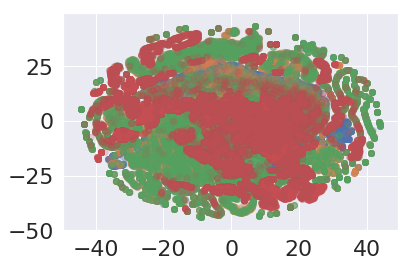

In [280]:
plt.scatter(xs[error_set.label=='retained'],ys[error_set.label=='retained'],alpha=0.1)
plt.scatter(xs[error_set.label=='2month'],ys[error_set.label=='2month'],alpha=0.1)
plt.scatter(xs[error_set.label=='month'],ys[error_set.label=='month'],alpha=0.1)
plt.scatter(xs[error_set.label=='week'],ys[error_set.label=='week'],alpha=0.1)

plt.show()

In [275]:
color
error_set.label.T

0           month
1            week
2        retained
3            week
4        retained
5          2month
6           month
7        retained
8          2month
9          2month
10          month
11       retained
12         2month
13         2month
14         2month
15          month
16           week
17          month
18          month
19       retained
20           week
21          month
22           week
23       retained
24           week
25           week
26         2month
27           week
28          month
29          month
           ...   
99970        week
99971    retained
99972        week
99973        week
99974      2month
99975      2month
99976    retained
99977       month
99978      2month
99979      2month
99980        week
99981        week
99982       month
99983      2month
99984    retained
99985      2month
99986      2month
99987       month
99988      2month
99989       month
99990       month
99991       month
99992       month
99993    retained
99994    r